In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [112]:
df = pd.read_csv('data.csv')

In [113]:
df

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108044,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


### Data cleaning and Outlier treatment

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [115]:
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [116]:
df.dropna(inplace=True)

In [117]:
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

<AxesSubplot:xlabel='x1'>

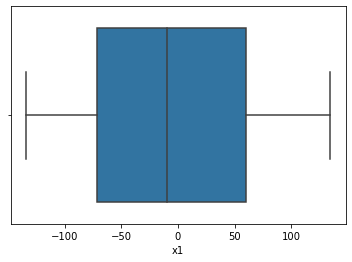

In [118]:
sns.boxplot(data=df,x='x1')

In [120]:
df['x2'].describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    2.219000e+03
mean     8.967782e+04
std      2.986680e+06
min     -1.348761e+02
25%     -8.025966e+01
50%     -1.566092e+00
75%      6.390448e+01
90%      9.927624e+01
95%      1.137850e+02
99%      1.291919e+02
max      1.000000e+08
Name: x2, dtype: float64

<AxesSubplot:xlabel='x2'>

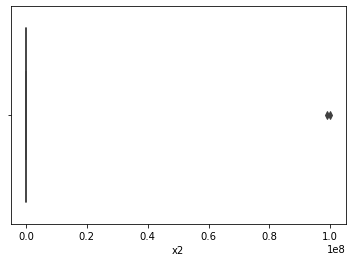

In [121]:
sns.boxplot(data=df,x='x2')

In [122]:
q1 = df['x2'].quantile(0.25)
q3 = df['x2'].quantile(0.75)
iqr= q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
df['x2']=df['x2'].apply(lambda x:Lower_tail if x<Lower_tail else x)
df['x2']=df['x2'].apply(lambda x:Upper_tail if x>Upper_tail else x)      

<AxesSubplot:xlabel='x2'>

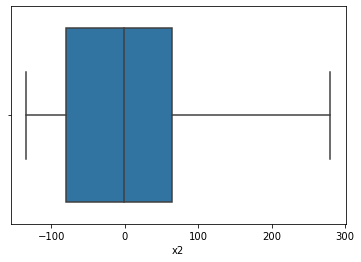

In [123]:
sns.boxplot(data=df,x='x2')

In [124]:
out =[]
for i in df['y']:
    out.append(i)

### Model building and hyper parameter tunning

In [38]:
x = df
y =df.pop('y')

In [40]:
from sklearn.preprocessing import StandardScaler
X= StandardScaler().fit_transform(x)
print(X.shape)

(2219, 2)


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [42]:
print(X_train.shape, y_test.shape)
print( X_train.shape, y_test.shape)

(1553, 2) (666,)
(1553, 2) (666,)


In [46]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

### Logistic Regression


In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
tuned_parameters = [{'C':[1, 2, 3, 4, 5,6,7,8,9], 'penalty':['l2','l1','l3']}]                                       
clf = GridSearchCV( LogisticRegression(), tuned_parameters, scoring='accuracy')

clf.fit(X_train, y_train)

print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print('scoring accuracy')
print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'C': 1, 'penalty': 'l2'}
LogisticRegression(C=1)
scoring accuracy
0.7657657657657657


In [49]:
classifier = LogisticRegression(penalty='l2',C=1)
classifier.fit(X_train, y_train)

LogisticRegression(C=1)

In [50]:
y_pred = classifier.predict(X_test)

In [54]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       378
           1       0.99      0.46      0.63       288

    accuracy                           0.77       666
   macro avg       0.85      0.73      0.73       666
weighted avg       0.83      0.77      0.74       666



In [55]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[377,   1],
       [155, 133]], dtype=int64)

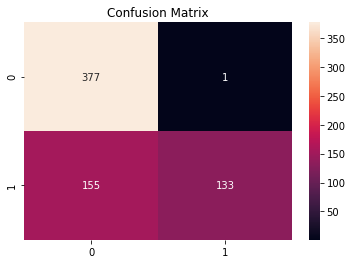

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

### svc with kernel linear

In [58]:
from sklearn.svm import SVC


In [59]:
tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]                                   
clf = RandomizedSearchCV( SVC(), tuned_parameters, scoring='accuracy')

clf.fit(X_train, y_train)
print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print('scoring accuracy')
print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'kernel': 'linear', 'C': 10}
SVC(C=10, kernel='linear')
scoring accuracy
0.7522522522522522


In [60]:
classifier = SVC(kernel='linear',C =10)
classifier.fit(X_train, y_train)

SVC(C=10, kernel='linear')

In [61]:
y_pred = classifier.predict(X_test)

In [62]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       378
           1       0.99      0.43      0.60       288

    accuracy                           0.75       666
   macro avg       0.84      0.71      0.71       666
weighted avg       0.82      0.75      0.73       666



In [63]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[377,   1],
       [164, 124]], dtype=int64)

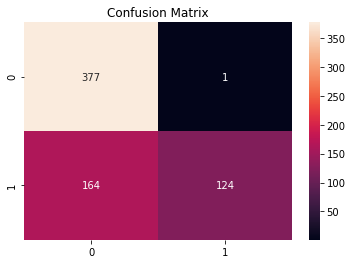

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

### svc with kernel rbf

In [65]:
from sklearn.svm import SVC


In [69]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': np.random.rand(4) , 'C': [1, 10, 100, 1000]}]                                   
clf = RandomizedSearchCV( SVC(), tuned_parameters, scoring='accuracy')

clf.fit(X_train, y_train)
print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print('scoring accuracy')
print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'kernel': 'rbf', 'gamma': 0.24538430194654504, 'C': 1000}
SVC(C=1000, gamma=0.24538430194654504)
scoring accuracy
0.9579579579579579


In [70]:
classifier = SVC(kernel='rbf',C =1000,gamma=0.24538430194654504)
classifier.fit(X_train, y_train)

SVC(C=1000, gamma=0.24538430194654504)

In [71]:
y_pred = classifier.predict(X_test)

In [72]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       378
           1       0.94      0.97      0.95       288

    accuracy                           0.96       666
   macro avg       0.96      0.96      0.96       666
weighted avg       0.96      0.96      0.96       666



In [73]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[360,  18],
       [ 10, 278]], dtype=int64)

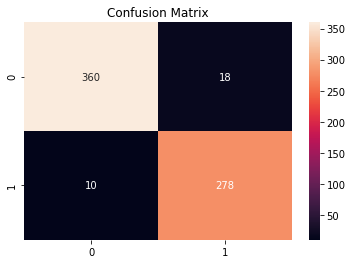

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

### decision tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
tuned_parameters = [{'max_depth':[1, 2, 3, 4, 5,6,7,8,9,10,11,12]}] 
clf = RandomizedSearchCV(
    DecisionTreeClassifier(), tuned_parameters, scoring='accuracy')
clf.fit(X_train, y_train)

print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print('scoring accuracy')
print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'max_depth': 7}
DecisionTreeClassifier(max_depth=7)
scoring accuracy
0.9354354354354354


In [79]:
classifier = DecisionTreeClassifier(max_depth=7)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [80]:
y_pred = classifier.predict(X_test)

In [81]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       378
           1       0.91      0.94      0.93       288

    accuracy                           0.94       666
   macro avg       0.93      0.94      0.93       666
weighted avg       0.94      0.94      0.94       666



In [82]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[351,  27],
       [ 16, 272]], dtype=int64)

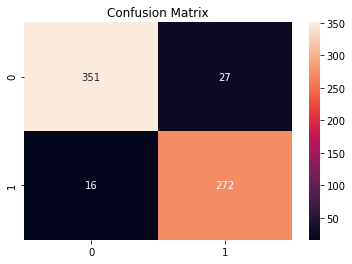

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

### knn classifier

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
tuned_parameters = [{'n_neighbors':[1, 2, 3, 4, 5,6,7,8,9,10], 'p':[1,2,3,4,5]}] 
clf = RandomizedSearchCV(
    KNeighborsClassifier(), tuned_parameters, scoring='accuracy')
clf.fit(X_train, y_train)

print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print('scoring accuracy')

print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'p': 3, 'n_neighbors': 9}
KNeighborsClassifier(n_neighbors=9, p=3)
scoring accuracy
0.948948948948949


In [90]:
classifier = KNeighborsClassifier(n_neighbors=9,p=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9, p=3)

In [91]:
y_pred = classifier.predict(X_test)

In [92]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       378
           1       0.94      0.94      0.94       288

    accuracy                           0.95       666
   macro avg       0.95      0.95      0.95       666
weighted avg       0.95      0.95      0.95       666



In [93]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[360,  18],
       [ 16, 272]], dtype=int64)

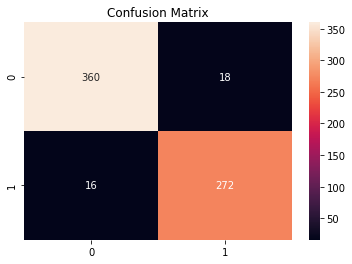

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

# Observations


### Here is the pictorial representation of our data
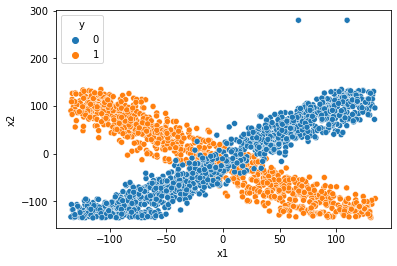
<b> we can see that there is no linear seperation between the classes<b>

<h><b>LOGISTIC REGRESSION</b></h>
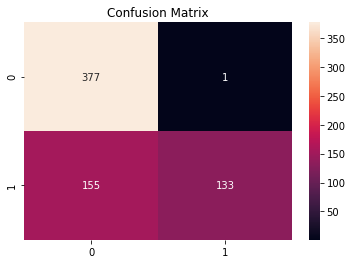
<b>By using logistic regression we are getting a accuracy of 0.75 and this is the confusion matrix we got by using logistic regression
Here we can clearly see that the linear regression is not doing well due to non linearity in the data among the total 666 test data 156 are misclassified</b>

<h><b> SVC WITH LINEAR KERNEL</b></h>
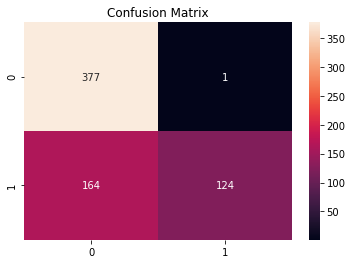
<b> By using svc linear we are getting accuracy of 0.75 which is very less and not acceptable svc with kernel linear is showing output similar to logistic regression here is the confusion matrix we got by using svc linear 
among the total 666  167 are misclassified so by seeing this we can tell that logistic is working better than svc on this data</b>

<h><b> DECISION TREE CLASSIFIER</b></h>
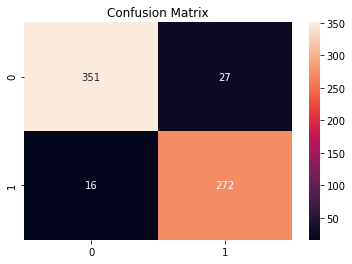
<b>By using Decisiontree classifier we are getting an accuracy of 0.94 and we have very less misclassification when compared to logistic and svc linear out of 666 only 43 were misclassified</b>

<h><b> KNN CLASSIFIER</b></h>
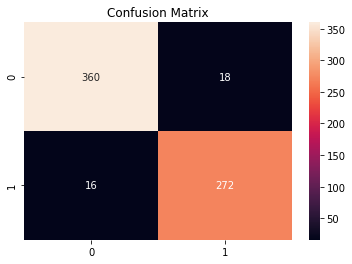
<b>By using KNN classifier we are getting an accuracy of 0.95 and we have very less misclassification when compared to logistic and svc linear and Decisiontree out of 666 only 34 were misclassified</b>

<h><b> SVC WITH RBF</b></h>
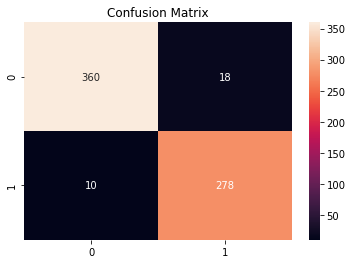
<B>By using svc with kernel rbf we are getting accuracy of 0.96 and we very less misclassfication compared to other algorithms
   this is due to kernel trick which helping to overcome the non linear seperation problem</B>

## so from above we can easily quote that svc with kernel RBF work best with our data as it is giving the highest accuracy and less misclassification